# Workflow

In [1]:
# for a particular highway direction (for example - US101S)

# for every post mile find the detectors

# Get their 5 minute data for a day

# store their speed for every time stamp in some suitable format (dataframe)

# Essential Libraries

In [2]:
import pandas as pd
import numpy as np
import datetime
import os,glob,tqdm
import matplotlib.pyplot as plt
import datetime
from datetime import datetime, timedelta


Bad key "text.kerning_factor" on line 4 in
C:\Users\desh669\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
http://github.com/matplotlib/matplotlib/blob/master/matplotlibrc.template
or from the matplotlib source distribution


In [3]:
cd C:\Users\desh669\OneDrive - PNNL\Documents\Python Scripts\Mobility Rahul

C:\Users\desh669\OneDrive - PNNL\Documents\Python Scripts\Mobility Rahul


In [4]:
post_mile_data = pd.read_csv('All_stations_District7.csv')
print(post_mile_data.shape)

## Only dealing with Mainline and HOV Detectors

post_mile_data = post_mile_data.loc[(post_mile_data['Type']=='Mainline') | (post_mile_data['Type']=='HOV')]

print(post_mile_data.shape)

## Only dealing with one of the highways - US101S

#post_mile_data = post_mile_data.loc[post_mile_data['Fwy']=='US101-S'].reset_index(drop=True)

print(post_mile_data.shape)

lat_long_data = pd.read_csv('ML_HOV_LAT_LONG.csv')
lat_long_data.index = lat_long_data['VDS_ID']
print(lat_long_data.shape)

(4860, 14)
(2751, 14)
(2751, 14)
(2751, 15)


In [5]:
post_mile_data.head()

,Fwy,District,County,City,CA PM,Abs PM,Length,ID,Name,Lanes,Type,Sensor Type,HOV,MS ID
4,SR2-E,7,Los Angeles,Los Angeles,15.2,7.76,2.65,767494,E-O ROUTE 5,3,Mainline,loops,No,2458
6,SR2-E,7,Los Angeles,Los Angeles,15.5,8.06,0.45,767509,FLETCHER DR,4,Mainline,loops,No,4457
8,SR2-E,7,Los Angeles,Los Angeles,16.1,8.66,0.45,767523,SAN FERNANDO RD,4,Mainline,loops,No,4458
10,SR2-E,7,Los Angeles,Los Angeles,16.4,8.96,0.45,767541,34TH AVE,4,Mainline,loops,No,2479
11,SR2-E,7,Los Angeles,Los Angeles,R17,9.56,0.55,767554,EAGLE ROCK BLVD,4,Mainline,loops,No,4459


# Making a Dictionary with key as Post Mile and Values as Detector at that post mile

In [6]:
dict_PM_as_key_Detectors_as_Values = {}
for k,g in post_mile_data.groupby(['Abs PM']):
    dict_PM_as_key_Detectors_as_Values[k] = list(g['ID'].values)

print(dict_PM_as_key_Detectors_as_Values)

{0.01: [775511, 774244, 774227, 774226, 774245], 0.08: [774217, 774216], 0.11: [716272], 0.18: [759257, 759259], 0.23: [775762, 775763], 0.32: [774236, 774235, 770599, 770598], 0.38: [773939], 0.48: [737229, 737232, 767166], 0.5: [716271], 0.56: [716273, 764425], 0.59: [761016, 761017], 0.6: [716402], 0.62: [764418], 0.63: [772410, 772411, 772396], 0.69: [717262, 774302, 774301], 0.78: [764050], 0.8: [770315], 0.84: [717365], 0.9: [760046, 716404], 0.93: [737237, 737242], 0.94: [774523, 774524], 0.95: [760975, 717570, 717571], 0.97: [716206], 1.0: [768297], 1.16: [717367], 1.17: [773281], 1.23: [773047], 1.3: [766875, 716405], 1.34: [737246], 1.54: [776425], 1.55: [717369, 717368, 765594], 1.58: [763498, 775752], 1.69: [772421, 772420], 1.7: [717263], 1.73: [717264], 1.75: [776480, 770303], 1.78: [737257, 737258], 1.8: [773062, 763634, 760063, 716407, 766873], 1.81: [718130, 765591], 1.84: [772980, 772689, 772711, 772701], 1.9: [775101, 761022, 718496], 1.92: [774206, 774204], 1.94: [7

# Getting lat and long for all these post miles

In [7]:
lats_= []
longs_=[]
for k,v in dict_PM_as_key_Detectors_as_Values.items():
    d = v[0]
    lats_.append(lat_long_data.loc[d]['LATITUDE'])
    longs_.append(lat_long_data.loc[d]['LONGITUDE'])
    
print(lats_)
print(longs_)

[34.334177000000004, 33.984215999999996, 33.872586, 34.016298, 33.748932, 33.982842, 34.153052, 34.019283, 34.06708, 33.872636, 34.153108, 33.931618, 34.029635999999996, 33.749269, 34.02902, 34.022411, 34.32289, 33.872789000000004, 33.931132, 34.02328, 33.775748, 34.153063, 34.029065, 34.323046000000005, 33.872471000000004, 34.028031, 33.931041, 33.931058, 34.025103, 34.053056, 33.873324, 33.758627000000004, 33.749223, 34.029648, 34.029608, 34.053569, 34.02693, 34.053512, 33.873486, 33.788736, 34.055021999999994, 34.154161, 34.052704999999996, 34.027751, 34.053705, 34.153816, 34.362535, 34.323367, 34.153535, 34.027623, 33.80915, 33.873496, 33.809588, 34.050545, 34.048371, 34.028077, 34.056973, 33.988048, 33.931513, 34.028893, 33.873339, 33.932384000000006, 34.032146000000004, 34.032661, 34.321653000000005, 33.772948, 33.933059, 34.153625, 34.043603999999995, 34.154022999999995, 34.171717, 34.030628, 33.821171, 34.375451, 33.873771999999995, 33.87359, 34.06459, 34.034977000000005, 34.06

[-118.50838200000001, -118.44118799999998, -118.289005, -118.48335800000001, -118.29023600000001, -118.437453, -118.36974, -118.47953500000001, -117.804144, -118.2812, -118.366127, -118.39443500000002, -118.21753400000001, -118.282032, -118.216326, -118.475871, -118.479923, -118.27630800000001, -118.389223, -118.473469, -118.206952, -118.359904, -118.211497, -118.47638799999999, -118.27073999999999, -118.20813600000001, -118.38349, -118.382272, -118.466669, -118.228007, -118.26404199999999, -118.28953999999999, -118.27004299999999, -118.199219, -118.198629, -118.231606, -118.459319, -118.232514, -118.25953100000001, -118.20766299999998, -117.78265800000001, -118.343375, -117.780575, -118.456128, -118.235846, -118.341876, -118.504833, -118.457366, -118.339979, -118.45175800000001, -118.08159599999999, -118.251545, -118.081304, -117.778066, -117.775944, -118.449505, -118.24227900000001, -118.402906, -118.36192700000001, -118.44643799999999, -118.246168, -118.3602, -118.18338700000001, -1

# Saving them in a table for future reference

In [8]:
main_table = pd.DataFrame(dict_PM_as_key_Detectors_as_Values.items(), columns=['Post_Mile', 'Detector'])
main_table['latitude'] = lats_
main_table['longitude'] = longs_
print(main_table.shape)
main_table.head()

(1368, 4)


,Post_Mile,Detector,latitude,longitude
0,0.01,"[775511, 774244, 774227, 774226, 774245]",34.334177,-118.508382
1,0.08,"[774217, 774216]",33.984216,-118.441188
2,0.11,[716272],33.872586,-118.289005
3,0.18,"[759257, 759259]",34.016298,-118.483358
4,0.23,"[775762, 775763]",33.748932,-118.290236


# Now let us get the 5 minute data for these detectors

In [9]:
cd C:\Users\desh669\OneDrive - PNNL\Documents\Python Scripts\Mobility Rahul\Agg Data\20191105

C:\Users\desh669\OneDrive - PNNL\Documents\Python Scripts\Mobility Rahul\Agg Data\20191105


In [10]:
path = r'C:\Users\desh669\OneDrive - PNNL\Documents\Python Scripts\Mobility Rahul\Agg Data\20191105'
print(path)
all_files = glob.glob(path +"/*.txt")
print(len(all_files))
colnames = ['VDS_ID','FLOW','OCCUPANCY','SPEED','VMT','VHT','Q','TRAVEL_TIME','DELAY','NUM_SAMPLES','PCT_OBSERVED']
li_processed_files = []
for filename in all_files:
    df = pd.read_csv(filename,index_col = None, delimiter = ",",names = colnames ,skiprows = 1)
    df['time'] = datetime.strptime(str(int(filename[-18:-4])),'%Y%m%d%H%M%S')
    li_processed_files.append(df)

li_processed_files = [dataframe.reset_index(drop = True) for dataframe in li_processed_files]

temp_df = pd.DataFrame()
temp_df = pd.concat(li_processed_files)

C:\Users\desh669\OneDrive - PNNL\Documents\Python Scripts\Mobility Rahul\Agg Data\20191105
285


In [11]:
##### This function is used to flatten the nested lists 
##### It is a recursive function since the same function is called once inside the function.
def flat(l):
    ret = []
    for i in l:
        if isinstance(i, list) or isinstance(i, tuple):
            ret.extend(flat(i))
        else:
            ret.append(i)
    return ret

In [12]:
detectors = []
for k,g in post_mile_data.groupby(['Abs PM']):
    detectors.append([*g['ID'].values])

detectors= flat(detectors)
print(len(detectors))
print(detectors)

2751


[775511, 774244, 774227, 774226, 774245, 774217, 774216, 716272, 759257, 759259, 775762, 775763, 774236, 774235, 770599, 770598, 773939, 737229, 737232, 767166, 716271, 716273, 764425, 761016, 761017, 716402, 764418, 772410, 772411, 772396, 717262, 774302, 774301, 764050, 770315, 717365, 760046, 716404, 737237, 737242, 774523, 774524, 760975, 717570, 717571, 716206, 768297, 717367, 773281, 773047, 766875, 716405, 737246, 776425, 717369, 717368, 765594, 763498, 775752, 772421, 772420, 717263, 717264, 776480, 770303, 737257, 737258, 773062, 763634, 760063, 716407, 766873, 718130, 765591, 772980, 772689, 772711, 772701, 775101, 761022, 718496, 774206, 774204, 775100, 763490, 776328, 773880, 773881, 764262, 764260, 768283, 760987, 760989, 776518, 737269, 717265, 717266, 717832, 763604, 717376, 717375, 765793, 717831, 769292, 773891, 773890, 769294, 765506, 776752, 776751, 765605, 765604, 766971, 764101, 773023, 773024, 773712, 773711, 774279, 774278, 767839, 767838, 737278, 717373, 717374,

In [13]:
### This is used to create the column names
dt_start = datetime(2019,9,23,0,0,0)
dt_end = datetime(2019,9,24,0,0,0)
column_names = []

while dt_start < dt_end:
    
    column_names.append(dt_start)
    
    dt_start = dt_start+timedelta(0,300)

In [14]:
# Populating the speed table
index_list = []
for p,q in temp_df.groupby(['VDS_ID']):
    if p in detectors:
        index_list.append(p)
print(index_list)

[715898, 715918, 715920, 715929, 715930, 715933, 715938, 715944, 715947, 715996, 716007, 716010, 716016, 716017, 716023, 716026, 716028, 716032, 716036, 716047, 716050, 716057, 716063, 716067, 716069, 716072, 716075, 716076, 716078, 716081, 716084, 716085, 716087, 716088, 716091, 716092, 716101, 716126, 716142, 716143, 716146, 716152, 716153, 716181, 716187, 716193, 716203, 716206, 716213, 716235, 716237, 716238, 716241, 716253, 716254, 716265, 716271, 716272, 716273, 716295, 716296, 716311, 716312, 716313, 716314, 716328, 716331, 716337, 716339, 716359, 716390, 716391, 716392, 716402, 716404, 716405, 716407, 716409, 716413, 716414, 716419, 716420, 716421, 716422, 716424, 716426, 716427, 716428, 716431, 716432, 716433, 716434, 716437, 716440, 716441, 716442, 716443, 716448, 716449, 716450, 716453, 716456, 716457, 716459, 716460, 716461, 716466, 716470, 716471, 716481, 716484, 716485, 716490, 716491, 716494, 716495, 716499, 716500, 716541, 716551, 716554, 716571, 716573, 716626, 716632,

In [15]:
speed_table = pd.DataFrame(index=index_list,columns=column_names)
speed_table.head()

,2019-09-23 00:00:00,2019-09-23 00:05:00,2019-09-23 00:10:00,2019-09-23 00:15:00,2019-09-23 00:20:00,2019-09-23 00:25:00,2019-09-23 00:30:00,2019-09-23 00:35:00,2019-09-23 00:40:00,2019-09-23 00:45:00,...,2019-09-23 23:10:00,2019-09-23 23:15:00,2019-09-23 23:20:00,2019-09-23 23:25:00,2019-09-23 23:30:00,2019-09-23 23:35:00,2019-09-23 23:40:00,2019-09-23 23:45:00,2019-09-23 23:50:00,2019-09-23 23:55:00
715898,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
715918,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
715920,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
715929,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
715930,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [16]:
li_ = []
for p,q in temp_df.groupby(['VDS_ID']):
    if p in detectors:
        #print(q[['SPEED','time']].reset_index(drop=True))
        #speed_table.loc[p] = q['SPEED']
        
        speed_df = pd.DataFrame(columns=list(q['time'].values))
        speed_df.loc[p] = q['SPEED'].to_list()
        
        li_.append(speed_df)
        #print(speed_df.head())
print(len(li_))

2751


In [17]:
speed_data = pd.concat(li_)
speed_data.head()

,2019-11-05 00:00:00,2019-11-05 00:20:00,2019-11-05 00:25:00,2019-11-05 00:30:00,2019-11-05 00:35:00,2019-11-05 00:40:00,2019-11-05 00:45:00,2019-11-05 00:50:00,2019-11-05 00:55:00,2019-11-05 01:00:00,...,2019-11-05 23:10:00,2019-11-05 23:15:00,2019-11-05 23:20:00,2019-11-05 23:25:00,2019-11-05 23:30:00,2019-11-05 23:35:00,2019-11-05 23:40:00,2019-11-05 23:45:00,2019-11-05 23:50:00,2019-11-05 23:55:00
715898,70.4,69.6,69.4,69.2,68.8,68.9,68.8,68.9,68.7,69.0,...,69.4,69.5,69.7,69.7,69.8,69.6,69.8,69.8,69.7,69.5
715918,69.2,68.3,68.1,67.9,67.8,67.8,67.7,67.6,67.5,67.7,...,68.5,68.6,68.5,68.4,68.4,68.4,68.5,68.4,68.3,68.2
715920,64.4,63.9,64.4,64.6,65.1,65.1,64.9,64.6,63.5,63.9,...,65.0,65.5,64.6,64.5,64.0,64.0,64.3,64.2,63.3,63.6
715929,70.8,72.5,71.3,71.8,73.8,66.4,67.1,67.1,61.9,61.5,...,67.7,56.5,66.3,72.8,71.0,70.5,68.7,67.4,66.3,68.5
715930,67.9,68.0,69.1,67.5,66.7,66.9,65.7,65.3,66.7,67.3,...,67.1,66.0,67.2,69.4,67.6,67.5,68.7,68.3,66.7,67.2


In [18]:
Average_Speed = []
for i in range(main_table.shape[0]):
    a = main_table['Detector'][i]
    
    Average_Speed.append(np.mean([round(np.mean(pd.DataFrame(speed_data.loc[d]).mean(axis=1)),2) for d in a]))
    
print(len(Average_Speed))

main_table['Average_Speed'] = Average_Speed

main_table.head()

1368


,Post_Mile,Detector,latitude,longitude,Average_Speed
0,0.01,"[775511, 774244, 774227, 774226, 774245]",34.334177,-118.508382,61.896
1,0.08,"[774217, 774216]",33.984216,-118.441188,65.135
2,0.11,[716272],33.872586,-118.289005,64.030
3,0.18,"[759257, 759259]",34.016298,-118.483358,64.520
4,0.23,"[775762, 775763]",33.748932,-118.290236,57.915


In [19]:
cd C:\Users\desh669\OneDrive - PNNL\Documents\Rahul Important\Results of analysis

C:\Users\desh669\OneDrive - PNNL\Documents\Rahul Important\Results of analysis


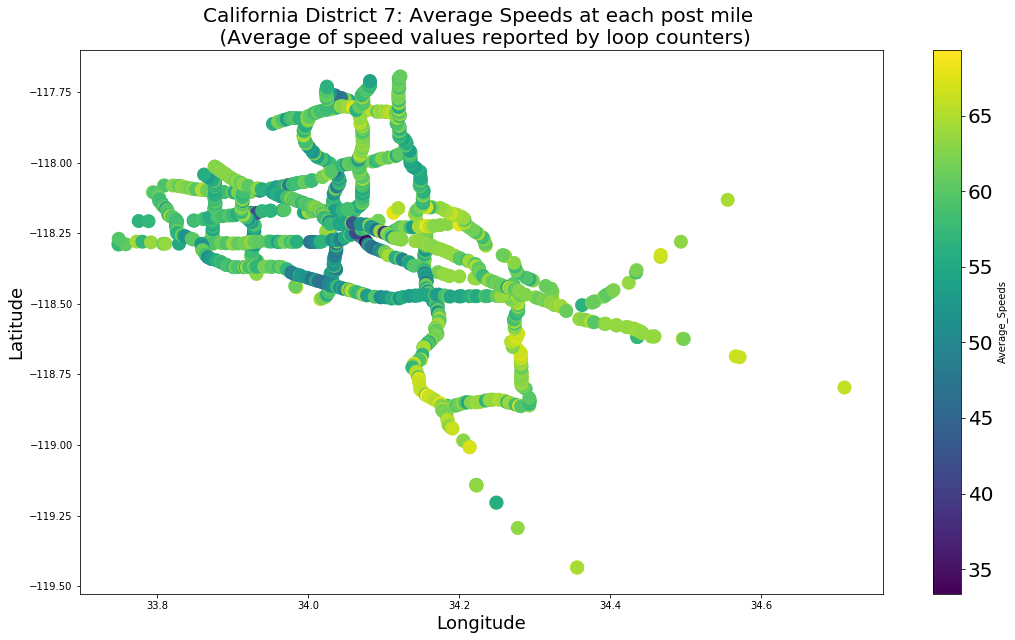

In [29]:
fig = plt.figure(figsize=(18,10))
plt.scatter(main_table['latitude'],main_table['longitude'],
            c=flat(list(main_table['Average_Speed'].values)),cmap='viridis',alpha=4,linewidths=8)
c = plt.colorbar(label='Average_Speeds')
plt.title('California District 7: Average Speeds at each post mile \n (Average of speed values reported by loop counters)',
          fontsize = 20)
plt.ylabel('Latitude',fontsize = 18)
plt.xlabel('Longitude',fontsize = 18)
c.ax.tick_params(labelsize=20) 
plt.savefig('District_7_Average_Speeds.png')